# EDA(Exploratory Data Analysis)
수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정입니다. 한마디로 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정

# 데이터 가져와서 변형하기

In [172]:
import pandas as pd

tips=pd.read_csv("tips.csv")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [173]:
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [174]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [175]:
add_rows=tips.tail().copy()
add_rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [176]:
import numpy as np

add_rows.iloc[0]=np.nan # 위치 번호로 접근
add_rows

,total_bill,tip,sex,smoker,day,time,size
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [177]:
add_rows.iloc[1, 4:6]=np.nan
add_rows.iloc[2, 1]=1000
add_rows

,total_bill,tip,sex,smoker,day,time,size
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,27.18,2.00,Female,Yes,NaN,NaN,2.0
241,22.67,1000.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


# 결측치 처리하기

In [178]:
tips = pd.concat([tips, add_rows], ignore_index=True)
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,27.18,2.00,Female,Yes,NaN,NaN,2.0
246,22.67,1000.00,Male,Yes,Sat,Dinner,2.0
247,17.82,1.75,Male,No,Sat,Dinner,2.0
248,18.78,3.00,Female,No,Thur,Dinner,2.0


In [179]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  248 non-null    float64
 1   tip         248 non-null    float64
 2   sex         248 non-null    object 
 3   smoker      248 non-null    object 
 4   day         247 non-null    object 
 5   time        247 non-null    object 
 6   size        248 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.7+ KB


In [180]:
tips.isnull().sum() # 결측치 처리

total_bill    1
tip           1
sex           1
smoker        1
day           2
time          2
size          1
dtype: int64

In [181]:
tips.dropna(how="all", inplace=True) # inplace = 변경된 값을 저장.
tips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 248
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  248 non-null    float64
 1   tip         248 non-null    float64
 2   sex         248 non-null    object 
 3   smoker      248 non-null    object 
 4   day         247 non-null    object 
 5   time        247 non-null    object 
 6   size        248 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.5+ KB


In [182]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           1
time          1
size          0
dtype: int64

In [183]:
tips[tips["day"].isnull()] #불리안 인덱싱

,total_bill,tip,sex,smoker,day,time,size
245,27.18,2.0,Female,Yes,NaN,NaN,2.0


In [184]:
tips["day"]=tips["day"].fillna("Fri")
tips["time"]=tips["time"].fillna("Lunch")
tips.loc[245] # index 이름으로 접근

total_bill     27.18
tip              2.0
sex           Female
smoker           Yes
day              Fri
time           Lunch
size             2.0
Name: 245, dtype: object

In [185]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# 중복데이터 처리

In [186]:
print(tips.duplicated().sum())
tips.drop_duplicates(inplace=True)
print(tips.duplicated().sum())

3
0


# 이상치 처리

In [187]:
tips.describe()

,total_bill,tip,size
count,245.000000,245.000000,245.000000
mean,19.855592,7.067673,2.567347
std,8.887783,63.711068,0.949846
min,3.070000,1.000000,1.000000
25%,13.390000,2.000000,2.000000
50%,17.820000,2.920000,2.000000
75%,24.270000,3.600000,3.000000
max,50.810000,1000.000000,6.000000


<Axes: >

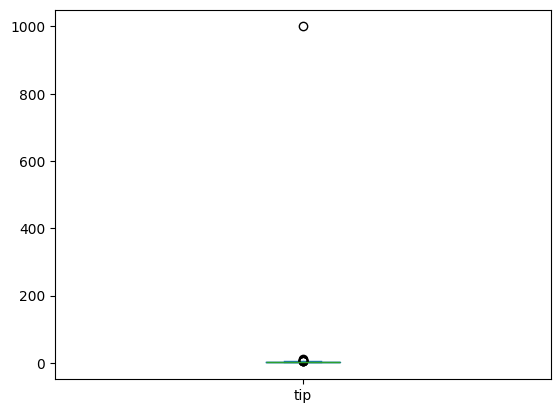

In [188]:
tips[["tip"]].plot(kind="box") # Series가 아닌 Dataframe으로 가져오기

In [189]:
tips[tips["tip"]==1000]["tip"]

246    1000.0
Name: tip, dtype: float64

In [190]:
tips=tips.drop(246, axis=0)
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
245,27.18,2.00,Female,Yes,Fri,Lunch,2.0


# 범주형 데이터 살펴보기

In [191]:
tips["day"].value_counts()

day
Sat     87
Sun     76
Thur    61
Fri     20
Name: count, dtype: int64

In [192]:
tips["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

            total_bill       tip
total_bill    1.000000  0.670869
tip           0.670869  1.000000


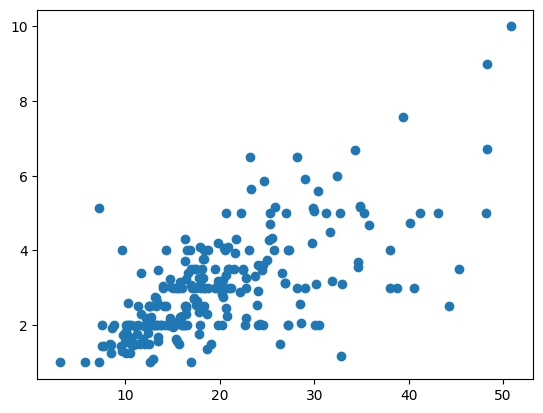

In [193]:
from matplotlib import pyplot as plt

print(tips[["total_bill", "tip"]].corr()) # correlation, 상관관계 분석
plt.scatter(tips["total_bill"], tips["tip"])

In [194]:
# 팁 비율 열 추가
tips["tip_pct"]=tips["tip"]/tips["total_bill"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808


In [195]:
tips[["tip_pct", "total_bill", "size"]].corr()

,tip_pct,total_bill,size
tip_pct,1.000000,-0.342338,-0.139044
total_bill,-0.342338,1.000000,0.594269
size,-0.139044,0.594269,1.000000


# 그룹화 분석

In [196]:
tips["tip_pct"].groupby(tips["day"]).mean() # 요일별 팁 비율 확인

day
Fri     0.165097
Sat     0.153152
Sun     0.166897
Thur    0.161397
Name: tip_pct, dtype: float64

In [198]:
print(tips["tip_pct"].groupby([tips["day"], tips["time"]]).mean())
print(tips["tip_pct"].groupby([tips["day"], tips["time"]]).mean().index) # 계층 인덱스 확인

day   time  
Fri   Dinner    0.158916
      Lunch     0.174367
Sat   Dinner    0.153152
Sun   Dinner    0.166897
Thur  Dinner    0.159744
      Lunch     0.161425
Name: tip_pct, dtype: float64
MultiIndex([( 'Fri', 'Dinner'),
            ( 'Fri',  'Lunch'),
            ( 'Sat', 'Dinner'),
            ( 'Sun', 'Dinner'),
            ('Thur', 'Dinner'),
            ('Thur',  'Lunch')],
           names=['day', 'time'])


In [200]:
tips["tip_pct"].groupby([tips["day"], tips["time"]]).mean().unstack(fill_value=0) # 계층 인덱스 파괴

time,Dinner,Lunch
day,,
Fri,0.158916,0.174367
Sat,0.153152,0.000000
Sun,0.166897,0.000000
Thur,0.159744,0.161425


In [203]:
day_sales=tips["total_bill"].groupby([tips["day"], tips["time"]]).sum().unstack(fill_value=0) # 계층 인덱스 파괴
day_sales

time,Dinner,Lunch
day,,
Fri,235.96,117.10
Sat,1778.40,0.00
Sun,1627.16,0.00
Thur,18.78,1064.55


<Axes: xlabel='day'>

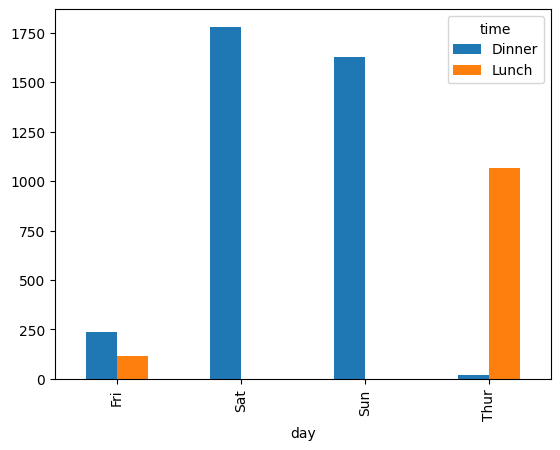

In [204]:
day_sales.plot.bar()

In [205]:
tips["tip_pct"].groupby([tips["sex"], tips["smoker"]]).mean().unstack(fill_value=0)

smoker,No,Yes
sex,,
Female,0.156921,0.179718
Male,0.160669,0.152771
